# Data

In [1]:
pip install kmodes


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import library
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from kmodes.kprototypes import KPrototypes

In [3]:
path = "C:\\Users\\Hasan Zein\\IFest Unpad\\Data - Kualifikasi.csv"

In [4]:
df = pd.read_csv(path,sep=";")

In [5]:
df

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Abbey Carpenter,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Abbey Dubois,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...
11494,Carter Downing,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,"4,5",FIKOM
11495,Carter Driscoll,Wanita,NaN,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,"3,5",DKV
11496,Carter Drummond,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5,FT
11497,Carter Dubois,Wanita,Kos,Bekerja,NaN,2007,Karawang,UKM_4,Tidak,"4,5",DKV


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               11499 non-null  object
 1   Gender             11499 non-null  object
 2   Tinggal_Dengan     7517 non-null   object
 3   Status_Kerja       11499 non-null  object
 4   Biaya              7720 non-null   object
 5   Tgl_Daftar_Kuliah  11499 non-null  int64 
 6   Alamat             11499 non-null  object
 7   UKM                11499 non-null  object
 8   Organisasi_Kampus  11499 non-null  object
 9   Lama_Kuliah        11499 non-null  object
 10  Fakultas           11499 non-null  object
dtypes: int64(1), object(10)
memory usage: 988.3+ KB


In [7]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Nama                 9731
Gender                  2
Tinggal_Dengan          2
Status_Kerja            2
Biaya                   2
Alamat                  6
UKM                     5
Organisasi_Kampus       2
Lama_Kuliah             8
Fakultas                5
dtype: int64

# Missing Value

In [8]:
df.isna().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

<AxesSubplot:>

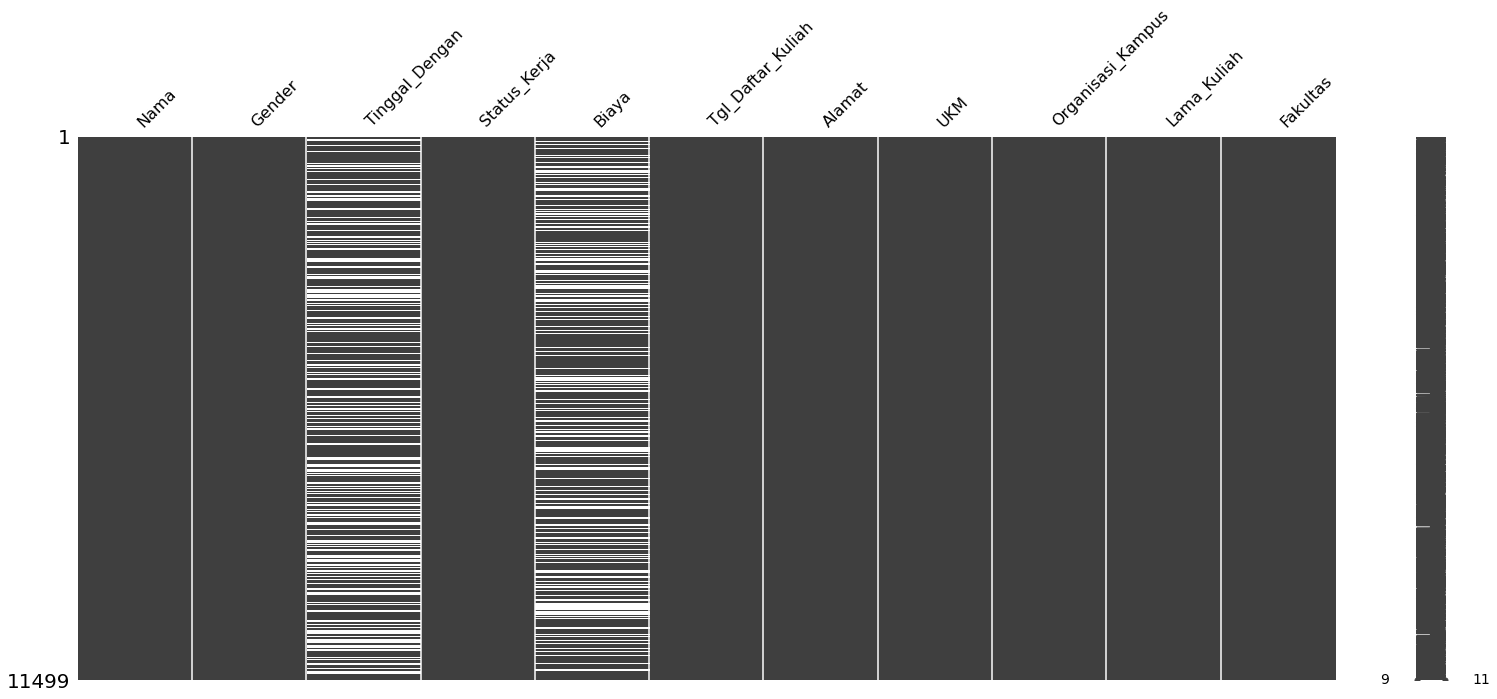

In [9]:
msno.matrix(df)

# Visualisasi

## Gender

<AxesSubplot:title={'center':'Frekuensi Gender'}>

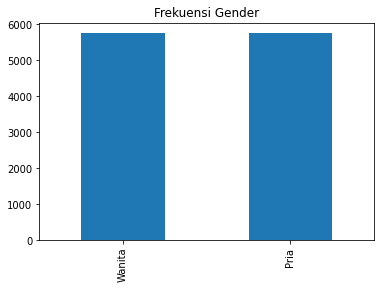

In [10]:
df["Gender"].value_counts().plot(kind="bar",title="Frekuensi Gender")

## Status Tinggal

<AxesSubplot:title={'center':'Frekuensi Status Tinggal'}>

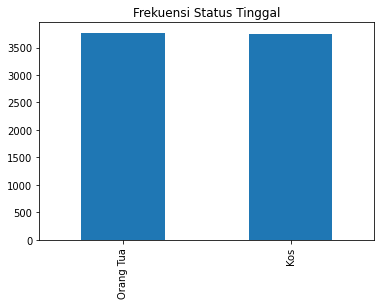

In [11]:
df["Tinggal_Dengan"].value_counts().plot(kind="bar",title="Frekuensi Status Tinggal")

## Status Kerja

<AxesSubplot:title={'center':'Frekuensi Status Kerja'}>

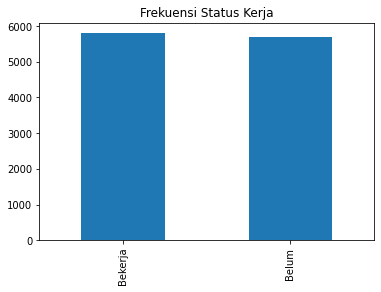

In [12]:
df["Status_Kerja"].value_counts().plot(kind="bar",title="Frekuensi Status Kerja")

## Biaya Kuliah

<AxesSubplot:title={'center':'Frekuensi Biaya'}>

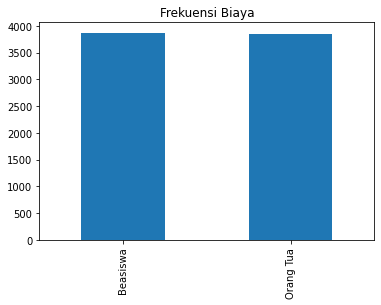

In [13]:
df["Biaya"].value_counts().plot(kind="bar",title="Frekuensi Biaya")

## Alamat

<AxesSubplot:title={'center':'Frekuensi Alamat'}>

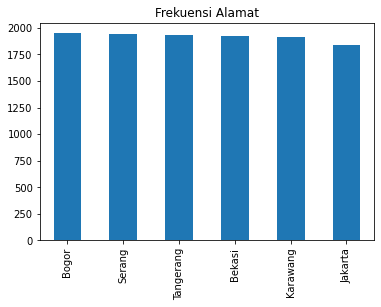

In [14]:
df["Alamat"].value_counts().plot(kind="bar",title="Frekuensi Alamat")

## UKM

<AxesSubplot:title={'center':'Frekuensi UKM'}>

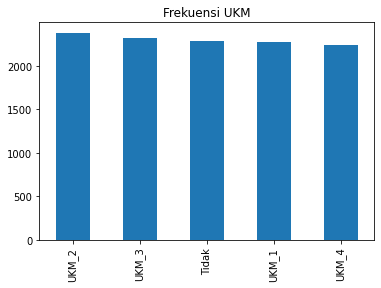

In [15]:
df["UKM"].value_counts().plot(kind="bar",title="Frekuensi UKM")

## Organisasi_Kampus

<AxesSubplot:title={'center':'Frekuensi Organisasi_Kampus'}>

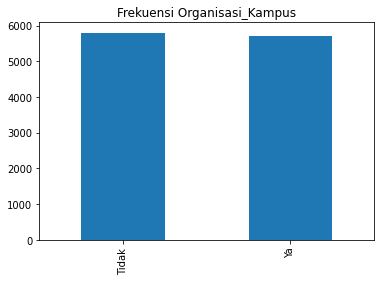

In [16]:
df["Organisasi_Kampus"].value_counts().plot(kind="bar",title="Frekuensi Organisasi_Kampus")

## Fakultas

<AxesSubplot:title={'center':'Frekuensi Fakultas'}>

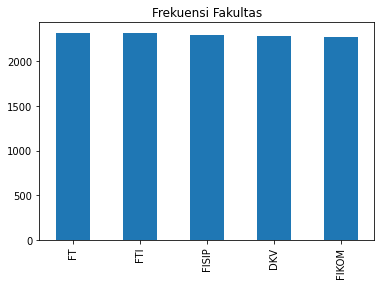

In [17]:
df["Fakultas"].value_counts().plot(kind="bar",title="Frekuensi Fakultas")

## Lama Kuliah

In [18]:
df["Lama_Kuliah"]=df["Lama_Kuliah"].str.replace(',','.',regex=True)

In [19]:
df["Lama_Kuliah"]=df["Lama_Kuliah"].astype(float)

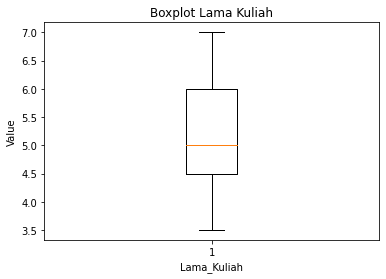

In [20]:
# Boxplot Lama Kuliah
plt.boxplot(df["Lama_Kuliah"])
plt.xlabel("Lama_Kuliah")
plt.ylabel("Value")
plt.title("Boxplot Lama Kuliah")
plt.show() 

# Missing Value Handling

In [21]:
# Check format again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     7517 non-null   object 
 3   Status_Kerja       11499 non-null  object 
 4   Biaya              7720 non-null   object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  object 
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 988.3+ KB


## Simple Imputer

In [22]:
# Module simple imputer
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy='constant',missing_values=np.nan, fill_value="Others")

In [24]:
imputer = imputer.fit(df[['Tinggal_Dengan','Biaya']])
df[['Tinggal_Dengan','Biaya']] = imputer.transform(df[['Tinggal_Dengan','Biaya']])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     11499 non-null  object 
 3   Status_Kerja       11499 non-null  object 
 4   Biaya              11499 non-null  object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  object 
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 988.3+ KB


In [26]:
df

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV
1,Abbey Carpenter,Wanita,Others,Belum,Others,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM
2,Abbey Dubois,Wanita,Others,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,Others,2009,Bekasi,Tidak,Ya,6.5,DKV
...,...,...,...,...,...,...,...,...,...,...,...
11494,Carter Downing,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,4.5,FIKOM
11495,Carter Driscoll,Wanita,Others,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,3.5,DKV
11496,Carter Drummond,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5.0,FT
11497,Carter Dubois,Wanita,Kos,Bekerja,Others,2007,Karawang,UKM_4,Tidak,4.5,DKV


# Clustering Model

In [27]:
# Drop Column
df2=df.drop(columns=['Nama', 'Gender','Alamat','Tinggal_Dengan',"Tgl_Daftar_Kuliah"])

In [28]:
# check df
df2

,Status_Kerja,Biaya,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Belum,Beasiswa,UKM_3,Ya,3.5,DKV
1,Belum,Others,UKM_2,Tidak,4.0,FIKOM
2,Bekerja,Beasiswa,UKM_4,Tidak,4.5,FIKOM
3,Belum,Beasiswa,UKM_1,Tidak,5.5,DKV
4,Bekerja,Others,Tidak,Ya,6.5,DKV
...,...,...,...,...,...,...
11494,Belum,Orang Tua,UKM_3,Ya,4.5,FIKOM
11495,Bekerja,Beasiswa,Tidak,Tidak,3.5,DKV
11496,Bekerja,Beasiswa,UKM_2,Ya,5.0,FT
11497,Bekerja,Others,UKM_4,Tidak,4.5,DKV


In [29]:
# Get the position of categorical columns
catColumnsPos = [df2.columns.get_loc(col) for col in list(df2.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Status_Kerja', 'Biaya', 'UKM', 'Organisasi_Kampus', 'Fakultas']
Categorical columns position  : [0, 1, 2, 3, 5]


In [30]:
# df to matrix
dfMatrix = df2.to_numpy()
dfMatrix

array([['Belum', 'Beasiswa', 'UKM_3', 'Ya', 3.5, 'DKV'],
       ['Belum', 'Others', 'UKM_2', 'Tidak', 4.0, 'FIKOM'],
       ['Bekerja', 'Beasiswa', 'UKM_4', 'Tidak', 4.5, 'FIKOM'],
       ...,
       ['Bekerja', 'Beasiswa', 'UKM_2', 'Ya', 5.0, 'FT'],
       ['Bekerja', 'Others', 'UKM_4', 'Tidak', 4.5, 'DKV'],
       ['Belum', 'Others', 'UKM_2', 'Ya', 4.5, 'FIKOM']], dtype=object)

In [31]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [32]:
cost

[36360.86479901432,
 24647.30094100115,
 21799.828390856852,
 20106.629688957164,
 18821.887521021068,
 17873.01722894947,
 17314.548304183216,
 16810.54146358192,
 16224.750865486674]

In [33]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

In [34]:
# Check result
df_cost

,Cluster,Cost
0,1,36360.864799
1,2,24647.300941
2,3,21799.828391
3,4,20106.629689
4,5,18821.887521
5,6,17873.017229
6,7,17314.548304
7,8,16810.541464
8,9,16224.750865


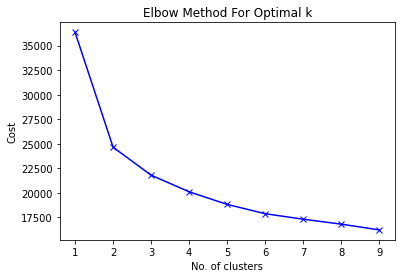

In [35]:
#plot cost
plt.plot(df_cost["Cluster"], df_cost["Cost"], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
# Fit Cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 0, 1, 0], dtype=uint16)

In [37]:
# Check information cluster
# Cost
kprototype.cost_

21799.828390856852

In [38]:
# Centroid
kprototype.cluster_centroids_

array([['5.212875304300784', 'Belum', 'Orang Tua', 'UKM_2', 'Ya', 'FTI'],
       ['4.01220138710506', 'Bekerja', 'Beasiswa', 'UKM_4', 'Tidak',
        'FISIP'],
       ['6.505500127909952', 'Bekerja', 'Orang Tua', 'Tidak', 'Tidak',
        'FIKOM']], dtype='<U32')

In [39]:
# Add the cluster to the dataframe
df['Cluster'] = kprototype.labels_
df['Cluster label'] = df['Cluster'].map({0:'First', 1:'Second', 2:'Third'})

In [40]:
df

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Cluster,Cluster label
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV,1,Second
1,Abbey Carpenter,Wanita,Others,Belum,Others,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM,1,Second
2,Abbey Dubois,Wanita,Others,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM,1,Second
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV,0,First
4,Abbey Logan,Wanita,Orang Tua,Bekerja,Others,2009,Bekasi,Tidak,Ya,6.5,DKV,2,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Carter Downing,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,4.5,FIKOM,0,First
11495,Carter Driscoll,Wanita,Others,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,3.5,DKV,1,Second
11496,Carter Drummond,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5.0,FT,0,First
11497,Carter Dubois,Wanita,Kos,Bekerja,Others,2007,Karawang,UKM_4,Tidak,4.5,DKV,1,Second


<AxesSubplot:title={'center':'Frekuensi Status Cluster label'}>

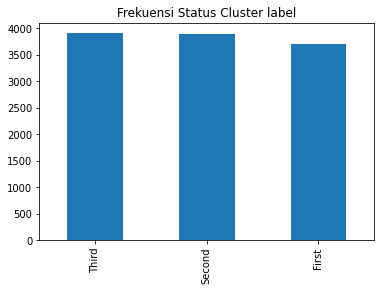

In [41]:
# Persebaran cluster
df["Cluster label"].value_counts().plot(kind="bar",title="Frekuensi Status Cluster label")

In [42]:
# Filtering data
Cluster1 = df.loc[df["Cluster label"]=="First"]
Cluster2 = df.loc[df["Cluster label"]=="Second"]
Cluster3 = df.loc[df["Cluster label"]=="Third"] 

## Summary Per Cluster

In [43]:
# Check
Cluster1.describe(include='all') 

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Cluster,Cluster label
count,3697,3697,3697,3697,3697,3697.000000,3697,3697,3697,3697.000000,3697,3697.0,3697
unique,3498,2,3,2,3,NaN,6,5,2,NaN,5,NaN,1
top,Anabel Richards,Pria,Others,Belum,Orang Tua,NaN,Bogor,UKM_2,Ya,NaN,FTI,NaN,First
freq,2,1885,1279,2535,1493,NaN,648,1064,2540,NaN,1024,NaN,3697
mean,NaN,NaN,NaN,NaN,NaN,2007.996484,NaN,NaN,NaN,5.212875,NaN,0.0,NaN
std,NaN,NaN,NaN,NaN,NaN,0.816323,NaN,NaN,NaN,0.558040,NaN,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,3.500000,NaN,0.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,5.000000,NaN,0.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,5.000000,NaN,0.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,5.500000,NaN,0.0,NaN


In [44]:
Cluster2.describe(include='all') 

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Cluster,Cluster label
count,3893,3893,3893,3893,3893,3893.000000,3893,3893,3893,3893.000000,3893,3893.0,3893
unique,3687,2,3,2,3,NaN,6,5,2,NaN,5,NaN,1
top,Carl Yard,Wanita,Others,Bekerja,Beasiswa,NaN,Tangerang,UKM_4,Tidak,NaN,FISIP,NaN,Second
freq,2,1990,1347,2297,1552,NaN,689,894,2344,NaN,925,NaN,3893
mean,NaN,NaN,NaN,NaN,NaN,2008.003339,NaN,NaN,NaN,4.012201,NaN,1.0,NaN
std,NaN,NaN,NaN,NaN,NaN,0.818428,NaN,NaN,NaN,0.477438,NaN,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,3.500000,NaN,1.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,3.500000,NaN,1.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,4.000000,NaN,1.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,4.500000,NaN,1.0,NaN


In [45]:
Cluster3.describe(include='all') 

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Cluster,Cluster label
count,3909,3909,3909,3909,3909,3909.000000,3909,3909,3909,3909.000000,3909,3909.0,3909
unique,3709,2,3,2,3,NaN,6,5,2,NaN,5,NaN,1
top,Abbey Logan,Pria,Others,Bekerja,Orang Tua,NaN,Bogor,Tidak,Tidak,NaN,FIKOM,NaN,Third
freq,2,1961,1356,2346,1318,NaN,668,900,2295,NaN,896,NaN,3909
mean,NaN,NaN,NaN,NaN,NaN,2007.989256,NaN,NaN,NaN,6.505500,NaN,2.0,NaN
std,NaN,NaN,NaN,NaN,NaN,0.815276,NaN,NaN,NaN,0.468597,NaN,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,5.000000,NaN,2.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,6.000000,NaN,2.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,6.500000,NaN,2.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,7.000000,NaN,2.0,NaN


# Cluster 1

## Status Tinggal Dengan

<AxesSubplot:title={'center':'Frekuensi Status Tinggal Cluster 1'}>

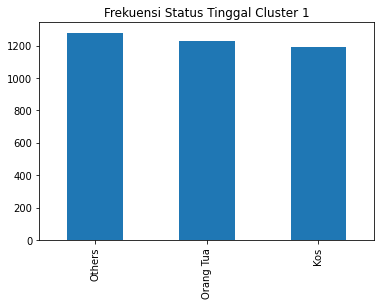

In [46]:
# Persebaran cluster
Cluster1["Tinggal_Dengan"].value_counts().plot(kind="bar",title="Frekuensi Status Tinggal Cluster 1")

In [47]:
Cluster1["Tinggal_Dengan"].value_counts()

Others       1279
Orang Tua    1227
Kos          1191
Name: Tinggal_Dengan, dtype: int64

## Status Kerja

<AxesSubplot:title={'center':'Frekuensi Status Kerja Cluster 1'}>

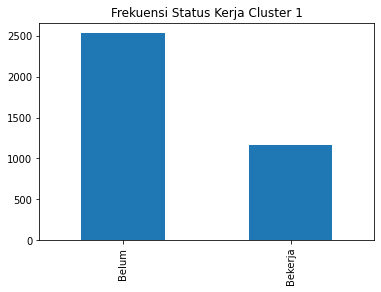

In [48]:
Cluster1["Status_Kerja"].value_counts().plot(kind="bar",title="Frekuensi Status Kerja Cluster 1")

In [49]:
Cluster1["Status_Kerja"].value_counts()

Belum      2535
Bekerja    1162
Name: Status_Kerja, dtype: int64

## Status Biaya Kuliah

<AxesSubplot:title={'center':'Frekuensi Status Biaya Cluster 1'}>

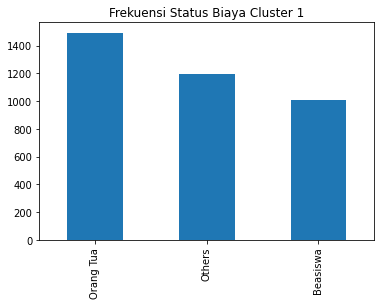

In [50]:
Cluster1["Biaya"].value_counts().plot(kind="bar",title="Frekuensi Status Biaya Cluster 1")

In [51]:
Cluster1["Biaya"].value_counts()

Orang Tua    1493
Others       1196
Beasiswa     1008
Name: Biaya, dtype: int64

## Status Alamat

<AxesSubplot:title={'center':'Frekuensi Alamat Cluster 1'}>

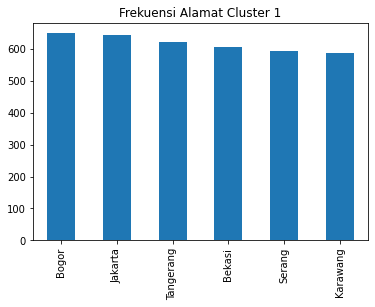

In [52]:
Cluster1["Alamat"].value_counts().plot(kind="bar",title="Frekuensi Alamat Cluster 1")

In [53]:
Cluster1["Alamat"].value_counts()

Bogor        648
Jakarta      642
Tangerang    622
Bekasi       605
Serang       592
Karawang     588
Name: Alamat, dtype: int64

## Status UKM

<AxesSubplot:title={'center':'Frekuensi UKM Cluster 1'}>

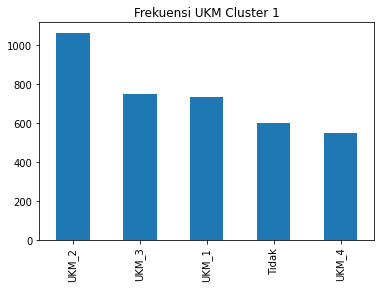

In [54]:
Cluster1["UKM"].value_counts().plot(kind="bar",title="Frekuensi UKM Cluster 1")

In [55]:
Cluster1["UKM"].value_counts()

UKM_2    1064
UKM_3     748
UKM_1     735
Tidak     602
UKM_4     548
Name: UKM, dtype: int64

## Status Organisasi Kampus

<AxesSubplot:title={'center':'Frekuensi Organisasi_Kampus Cluster 1'}>

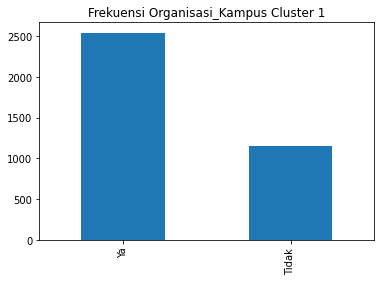

In [56]:
Cluster1["Organisasi_Kampus"].value_counts().plot(kind="bar",title="Frekuensi Organisasi_Kampus Cluster 1")

In [57]:
Cluster1["Organisasi_Kampus"].value_counts()

Ya       2540
Tidak    1157
Name: Organisasi_Kampus, dtype: int64

## Lama_Kuliah

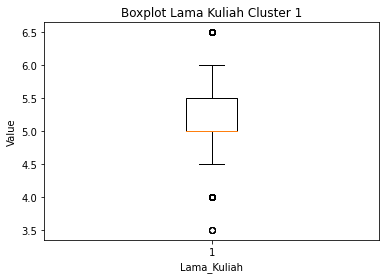

In [58]:
# Boxplot Lama Kuliah
plt.boxplot(Cluster1["Lama_Kuliah"])
plt.xlabel("Lama_Kuliah")
plt.ylabel("Value")
plt.title("Boxplot Lama Kuliah Cluster 1")
plt.show() 

# Cluster 2

## Status Tinggal

<AxesSubplot:title={'center':'Frekuensi Status Tinggal Cluster 2'}>

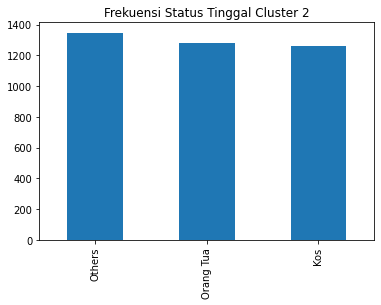

In [59]:
# Persebaran cluster
Cluster2["Tinggal_Dengan"].value_counts().plot(kind="bar",title="Frekuensi Status Tinggal Cluster 2")

In [60]:
Cluster2["Tinggal_Dengan"].value_counts()

Others       1347
Orang Tua    1282
Kos          1264
Name: Tinggal_Dengan, dtype: int64

## Status Kerja

<AxesSubplot:title={'center':'Frekuensi Status Kerja Cluster 2'}>

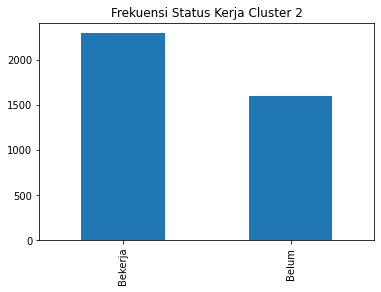

In [61]:
Cluster2["Status_Kerja"].value_counts().plot(kind="bar",title="Frekuensi Status Kerja Cluster 2")

In [62]:
Cluster2["Status_Kerja"].value_counts()

Bekerja    2297
Belum      1596
Name: Status_Kerja, dtype: int64

## Status Biaya Kuliah

<AxesSubplot:title={'center':'Frekuensi Status Biaya Cluster 2'}>

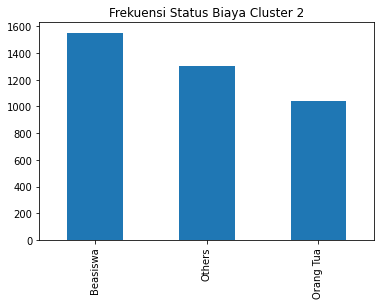

In [63]:
Cluster2["Biaya"].value_counts().plot(kind="bar",title="Frekuensi Status Biaya Cluster 2")

In [64]:
Cluster2["Biaya"].value_counts()

Beasiswa     1552
Others       1302
Orang Tua    1039
Name: Biaya, dtype: int64

## Status Alamat

<AxesSubplot:title={'center':'Frekuensi Alamat Cluster 2'}>

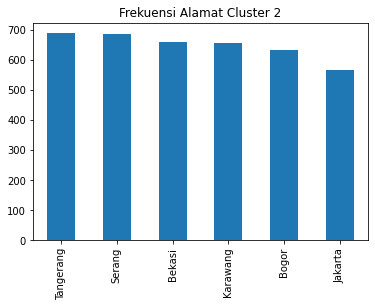

In [65]:
Cluster2["Alamat"].value_counts().plot(kind="bar",title="Frekuensi Alamat Cluster 2")

In [66]:
Cluster2["Alamat"].value_counts()

Tangerang    689
Serang       687
Bekasi       659
Karawang     658
Bogor        633
Jakarta      567
Name: Alamat, dtype: int64

## Status UKM

<AxesSubplot:title={'center':'Frekuensi UKM Cluster 2'}>

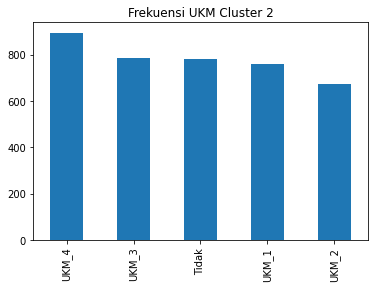

In [67]:
Cluster2["UKM"].value_counts().plot(kind="bar",title="Frekuensi UKM Cluster 2")

In [68]:
Cluster2["UKM"].value_counts()

UKM_4    894
UKM_3    786
Tidak    783
UKM_1    758
UKM_2    672
Name: UKM, dtype: int64

## Status Organisasi Kampus

<AxesSubplot:title={'center':'Frekuensi Organisasi_Kampus Cluster 2'}>

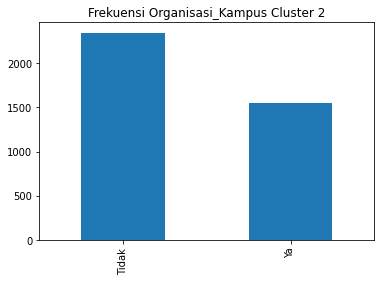

In [69]:
Cluster2["Organisasi_Kampus"].value_counts().plot(kind="bar",title="Frekuensi Organisasi_Kampus Cluster 2")

In [70]:
Cluster2["Organisasi_Kampus"].value_counts()

Tidak    2344
Ya       1549
Name: Organisasi_Kampus, dtype: int64

## Lama Kuliah

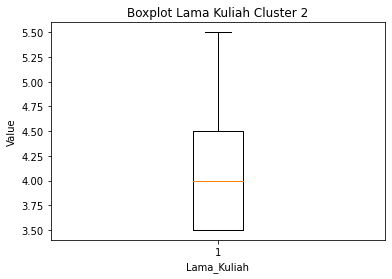

In [71]:
# Boxplot Lama Kuliah
plt.boxplot(Cluster2["Lama_Kuliah"])
plt.xlabel("Lama_Kuliah")
plt.ylabel("Value")
plt.title("Boxplot Lama Kuliah Cluster 2")
plt.show() 

# Cluster 3

## Status Tinggal

<AxesSubplot:title={'center':'Frekuensi Status Tinggal Cluster 3'}>

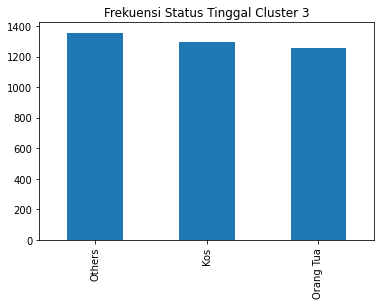

In [72]:
# Persebaran cluster
Cluster3["Tinggal_Dengan"].value_counts().plot(kind="bar",title="Frekuensi Status Tinggal Cluster 3")

In [73]:
Cluster3["Tinggal_Dengan"].value_counts()

Others       1356
Kos          1295
Orang Tua    1258
Name: Tinggal_Dengan, dtype: int64

## Status Kerja

<AxesSubplot:title={'center':'Frekuensi Status Kerja Cluster 3'}>

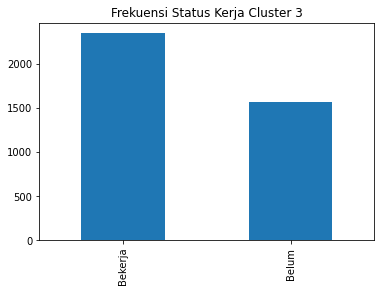

In [74]:
Cluster3["Status_Kerja"].value_counts().plot(kind="bar",title="Frekuensi Status Kerja Cluster 3")

In [75]:
Cluster3["Status_Kerja"].value_counts()

Bekerja    2346
Belum      1563
Name: Status_Kerja, dtype: int64

## Biaya Kuliah

<AxesSubplot:title={'center':'Frekuensi Status Biaya Cluster 3'}>

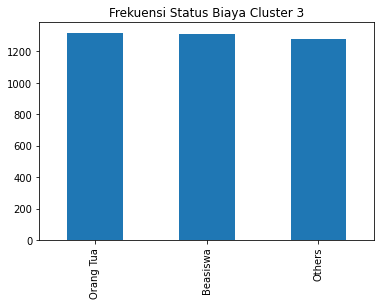

In [76]:
Cluster3["Biaya"].value_counts().plot(kind="bar",title="Frekuensi Status Biaya Cluster 3")

In [77]:
Cluster3["Biaya"].value_counts()

Orang Tua    1318
Beasiswa     1310
Others       1281
Name: Biaya, dtype: int64

## Status Alamat

<AxesSubplot:title={'center':'Frekuensi Alamat Cluster 3'}>

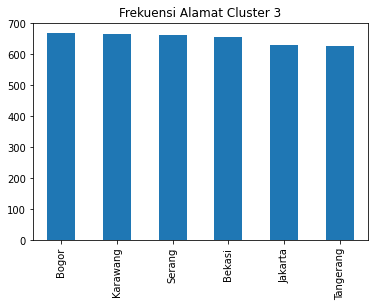

In [78]:
Cluster3["Alamat"].value_counts().plot(kind="bar",title="Frekuensi Alamat Cluster 3")

In [79]:
Cluster3["Alamat"].value_counts()

Bogor        668
Karawang     666
Serang       662
Bekasi       657
Jakarta      630
Tangerang    626
Name: Alamat, dtype: int64

## Status UKM

<AxesSubplot:title={'center':'Frekuensi UKM Cluster 3'}>

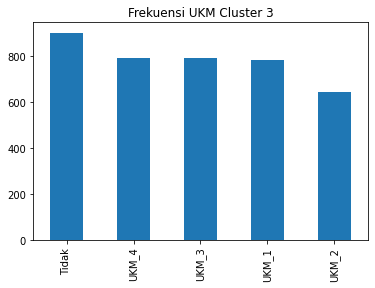

In [80]:
Cluster3["UKM"].value_counts().plot(kind="bar",title="Frekuensi UKM Cluster 3")

In [81]:
Cluster3["UKM"].value_counts()

Tidak    900
UKM_4    792
UKM_3    790
UKM_1    784
UKM_2    643
Name: UKM, dtype: int64

## Status Organisasi Kampus

<AxesSubplot:title={'center':'Frekuensi Organisasi_Kampus Cluster 3'}>

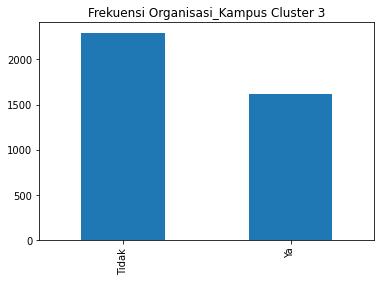

In [82]:
Cluster3["Organisasi_Kampus"].value_counts().plot(kind="bar",title="Frekuensi Organisasi_Kampus Cluster 3")

In [83]:
Cluster3["Organisasi_Kampus"].value_counts()

Tidak    2295
Ya       1614
Name: Organisasi_Kampus, dtype: int64

## Lama Kuliah

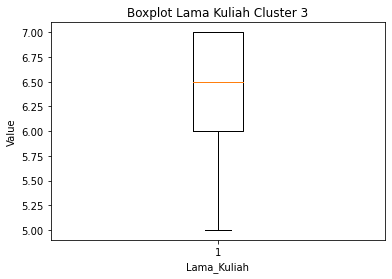

In [84]:
# Boxplot Lama Kuliah
plt.boxplot(Cluster3["Lama_Kuliah"])
plt.xlabel("Lama_Kuliah")
plt.ylabel("Value")
plt.title("Boxplot Lama Kuliah Cluster 3")
plt.show() 

# Export File

In [85]:
# Export to excel
Cluster1.to_excel("Cluster 1.xlsx", index = False)  

In [86]:
# Export to excel
Cluster2.to_excel("Cluster 2.xlsx", index = False)  

In [87]:
# Export to excel
Cluster3.to_excel("Cluster 3.xlsx", index = False)  

In [88]:
# Export to excel
df.to_excel("Data Clustered.xlsx", index = False)  